In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("/Users/kathanbhavsar/Desktop/Python,DS,ML/DATA/cluster_mpg.csv")

In [4]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
mpg,392.0,23.445918,7.805007,9.0,17.000,22.75,29.000,46.6
cylinders,392.0,5.471939,1.705783,3.0,4.000,4.00,8.000,8.0
displacement,392.0,194.411990,104.644004,68.0,105.000,151.00,275.750,455.0
horsepower,392.0,104.469388,38.491160,46.0,75.000,93.50,126.000,230.0
weight,392.0,2977.584184,849.402560,1613.0,2225.250,2803.50,3614.750,5140.0
acceleration,392.0,15.541327,2.758864,8.0,13.775,15.50,17.025,24.8
model_year,392.0,75.979592,3.683737,70.0,73.000,76.00,79.000,82.0


In [6]:
#When using a distance metric in an
#algorithm always scale

In [7]:
df['origin'].value_counts()

usa       245
japan      79
europe     68
Name: origin, dtype: int64

In [8]:
df_w_dummies = pd.get_dummies(df.drop('name',axis=1)) 

In [9]:
df_w_dummies

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin_europe,origin_japan,origin_usa
0,18.0,8,307.0,130.0,3504,12.0,70,0,0,1
1,15.0,8,350.0,165.0,3693,11.5,70,0,0,1
2,18.0,8,318.0,150.0,3436,11.0,70,0,0,1
3,16.0,8,304.0,150.0,3433,12.0,70,0,0,1
4,17.0,8,302.0,140.0,3449,10.5,70,0,0,1
...,...,...,...,...,...,...,...,...,...,...
387,27.0,4,140.0,86.0,2790,15.6,82,0,0,1
388,44.0,4,97.0,52.0,2130,24.6,82,1,0,0
389,32.0,4,135.0,84.0,2295,11.6,82,0,0,1
390,28.0,4,120.0,79.0,2625,18.6,82,0,0,1


In [10]:
from sklearn.preprocessing import MinMaxScaler

In [11]:
scaler = MinMaxScaler()

In [12]:
scaled_data = scaler.fit_transform(df_w_dummies)

In [13]:
scaled_data

array([[0.2393617 , 1.        , 0.61757106, ..., 0.        , 0.        ,
        1.        ],
       [0.15957447, 1.        , 0.72868217, ..., 0.        , 0.        ,
        1.        ],
       [0.2393617 , 1.        , 0.64599483, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.61170213, 0.2       , 0.17312661, ..., 0.        , 0.        ,
        1.        ],
       [0.50531915, 0.2       , 0.13436693, ..., 0.        , 0.        ,
        1.        ],
       [0.58510638, 0.2       , 0.13178295, ..., 0.        , 0.        ,
        1.        ]])

In [14]:
scaled_df = pd.DataFrame(scaled_data,columns=df_w_dummies.columns)

In [15]:
scaled_df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin_europe,origin_japan,origin_usa
0,0.239362,1.0,0.617571,0.456522,0.536150,0.238095,0.0,0.0,0.0,1.0
1,0.159574,1.0,0.728682,0.646739,0.589736,0.208333,0.0,0.0,0.0,1.0
2,0.239362,1.0,0.645995,0.565217,0.516870,0.178571,0.0,0.0,0.0,1.0
3,0.186170,1.0,0.609819,0.565217,0.516019,0.238095,0.0,0.0,0.0,1.0
4,0.212766,1.0,0.604651,0.510870,0.520556,0.148810,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
387,0.478723,0.2,0.186047,0.217391,0.333711,0.452381,1.0,0.0,0.0,1.0
388,0.930851,0.2,0.074935,0.032609,0.146583,0.988095,1.0,1.0,0.0,0.0
389,0.611702,0.2,0.173127,0.206522,0.193365,0.214286,1.0,0.0,0.0,1.0
390,0.505319,0.2,0.134367,0.179348,0.286929,0.630952,1.0,0.0,0.0,1.0


<AxesSubplot:>

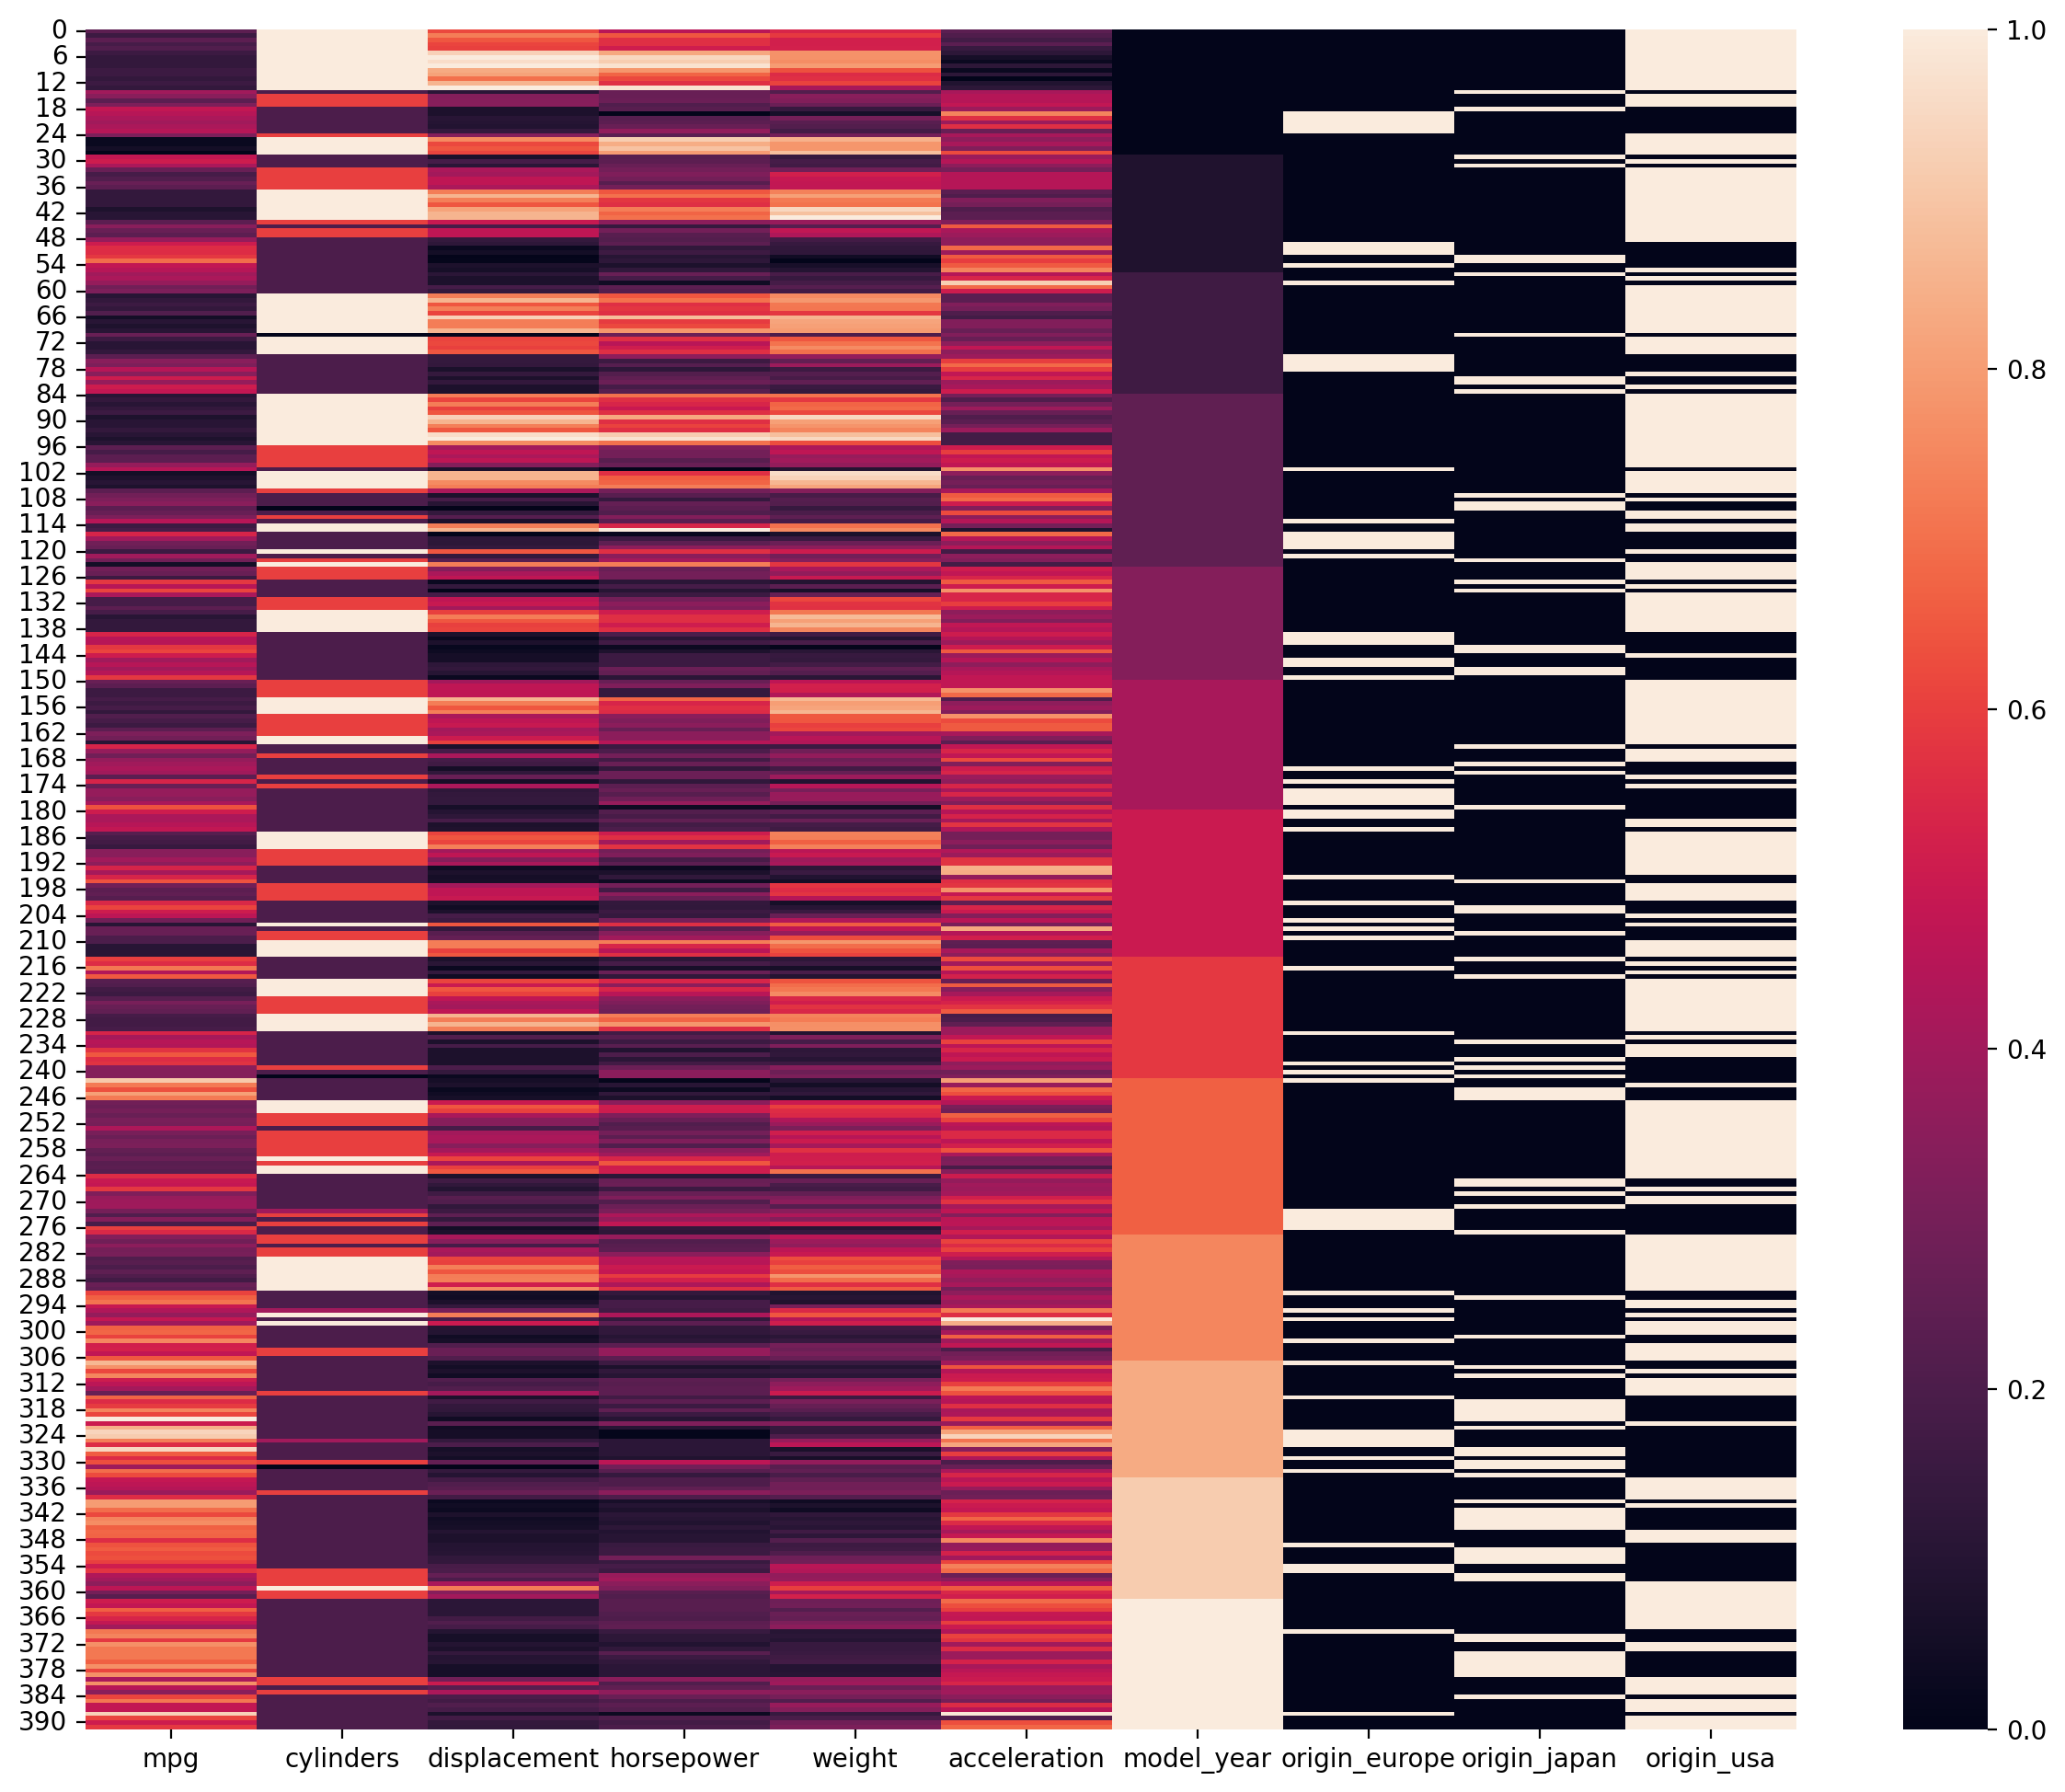

In [16]:
plt.figure(figsize=(15,12),dpi=200)
sns.heatmap(scaled_df)

<Figure size 3000x2400 with 0 Axes>

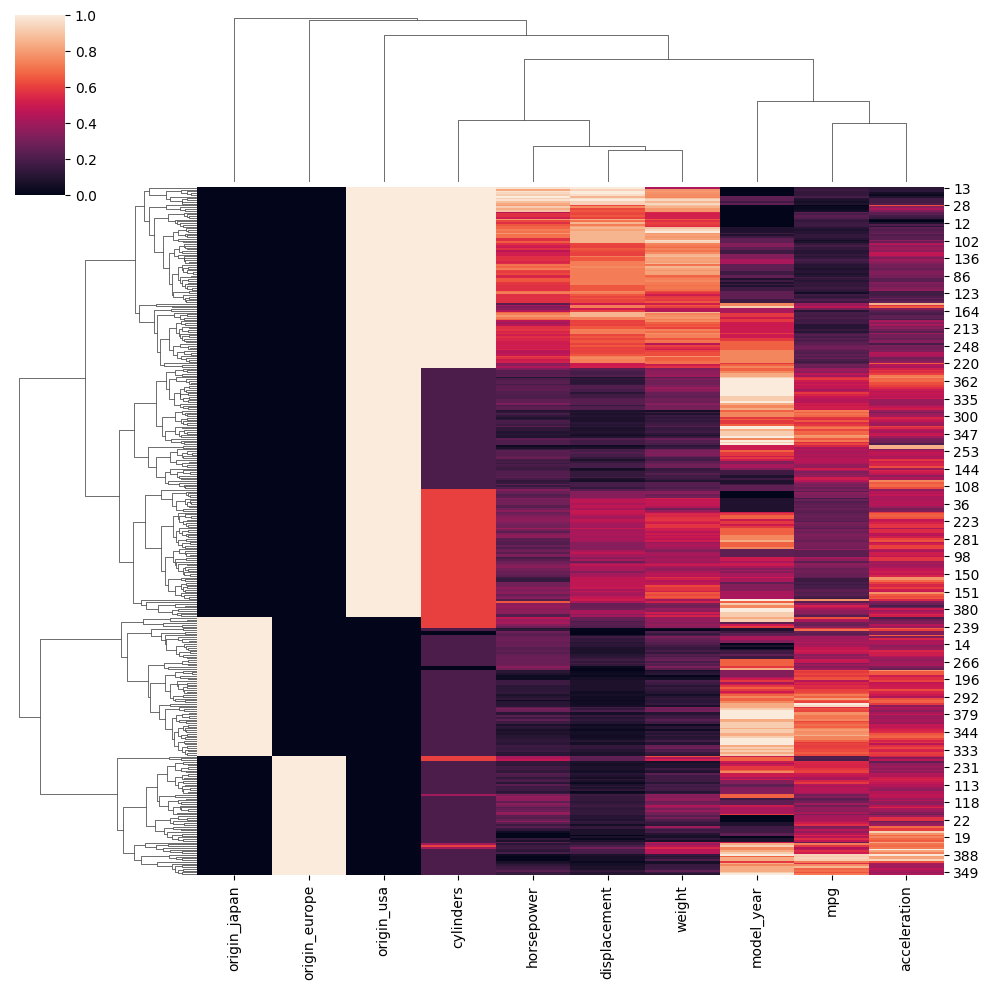

In [17]:
plt.figure(figsize=(15,12),dpi=200)
sns.clustermap(scaled_df,row_cluster=True)

<Figure size 3000x2400 with 0 Axes>

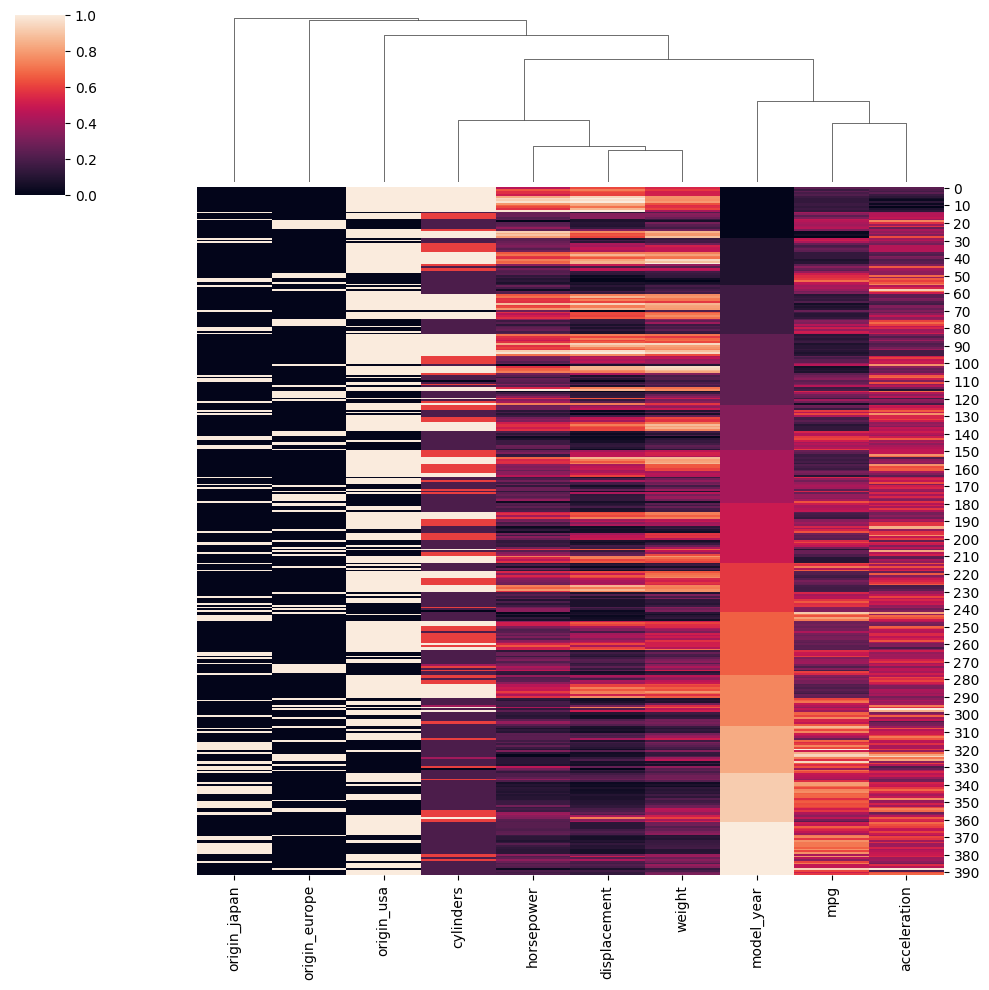

In [18]:
plt.figure(figsize=(15,12),dpi=200)
sns.clustermap(scaled_df,row_cluster=False)#This creates a dendogram

In [19]:
scaled_df.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin_europe,origin_japan,origin_usa
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.244313,0.451454,-0.565161
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.352324,-0.404209,0.610494
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.371633,-0.440825,0.655936
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.284948,-0.321936,0.489625
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.293841,-0.447929,0.600978
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.208298,0.115020,-0.258224
model_year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,-0.037745,0.199841,-0.136065
origin_europe,0.244313,-0.352324,-0.371633,-0.284948,-0.293841,0.208298,-0.037745,1.000000,-0.230157,-0.591434
origin_japan,0.451454,-0.404209,-0.440825,-0.321936,-0.447929,0.115020,0.199841,-0.230157,1.000000,-0.648583
origin_usa,-0.565161,0.610494,0.655936,0.489625,0.600978,-0.258224,-0.136065,-0.591434,-0.648583,1.000000


<AxesSubplot:>

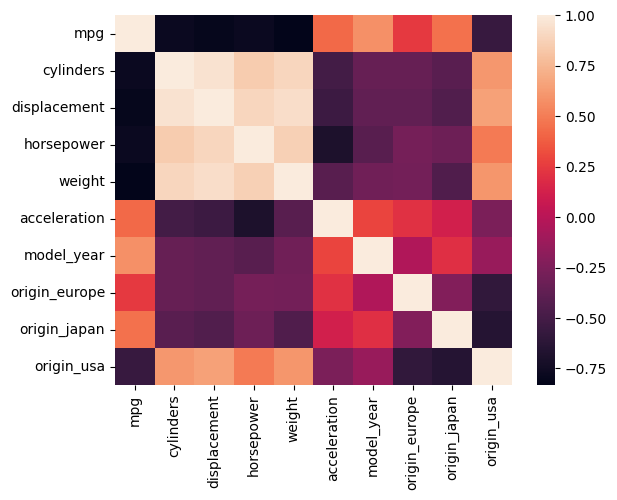

In [20]:
sns.heatmap(scaled_df.corr()) ##Kind of similar 

In [21]:
#We are after row clusters being true and columns cluster being falss

In [22]:
#Seaborn is not able to create clustermap for larger datasets
 

In [23]:
len(df)

392

In [24]:
from sklearn.cluster import AgglomerativeClustering

In [25]:
model = AgglomerativeClustering(n_clusters=4)

In [26]:
cluster_label = model.fit_predict(scaled_df)

In [27]:
cluster_label

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 0, 0, 0, 3, 2, 2, 2,
       2, 2, 0, 1, 1, 1, 1, 3, 0, 3, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 2, 2, 2, 3, 3, 2, 0, 3, 0, 2, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 3, 1, 1, 1, 1, 2, 2, 2, 2, 0, 3, 3, 0, 3, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 1, 1, 1, 1, 0, 3, 0, 3,
       3, 0, 0, 2, 1, 1, 2, 2, 2, 2, 1, 2, 3, 1, 0, 0, 0, 3, 0, 3, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 3, 3, 0, 2, 2, 3, 3, 2, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 3, 0, 0, 0, 3, 2, 3, 0, 2, 0, 2,
       2, 2, 2, 3, 2, 2, 0, 0, 2, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 2, 3, 0,
       0, 0, 0, 2, 3, 3, 0, 2, 1, 2, 3, 2, 1, 1, 1, 1, 3, 0, 2, 0, 3, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 2, 0, 3, 0, 0, 0, 3, 2, 3, 2, 3,
       2, 0, 3, 3, 3, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 3, 3, 0, 3, 0, 0, 3, 2, 2, 2, 2, 2, 3, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 3, 0, 0, 2, 1, 2, 1, 0, 0,

<AxesSubplot:xlabel='mpg', ylabel='weight'>

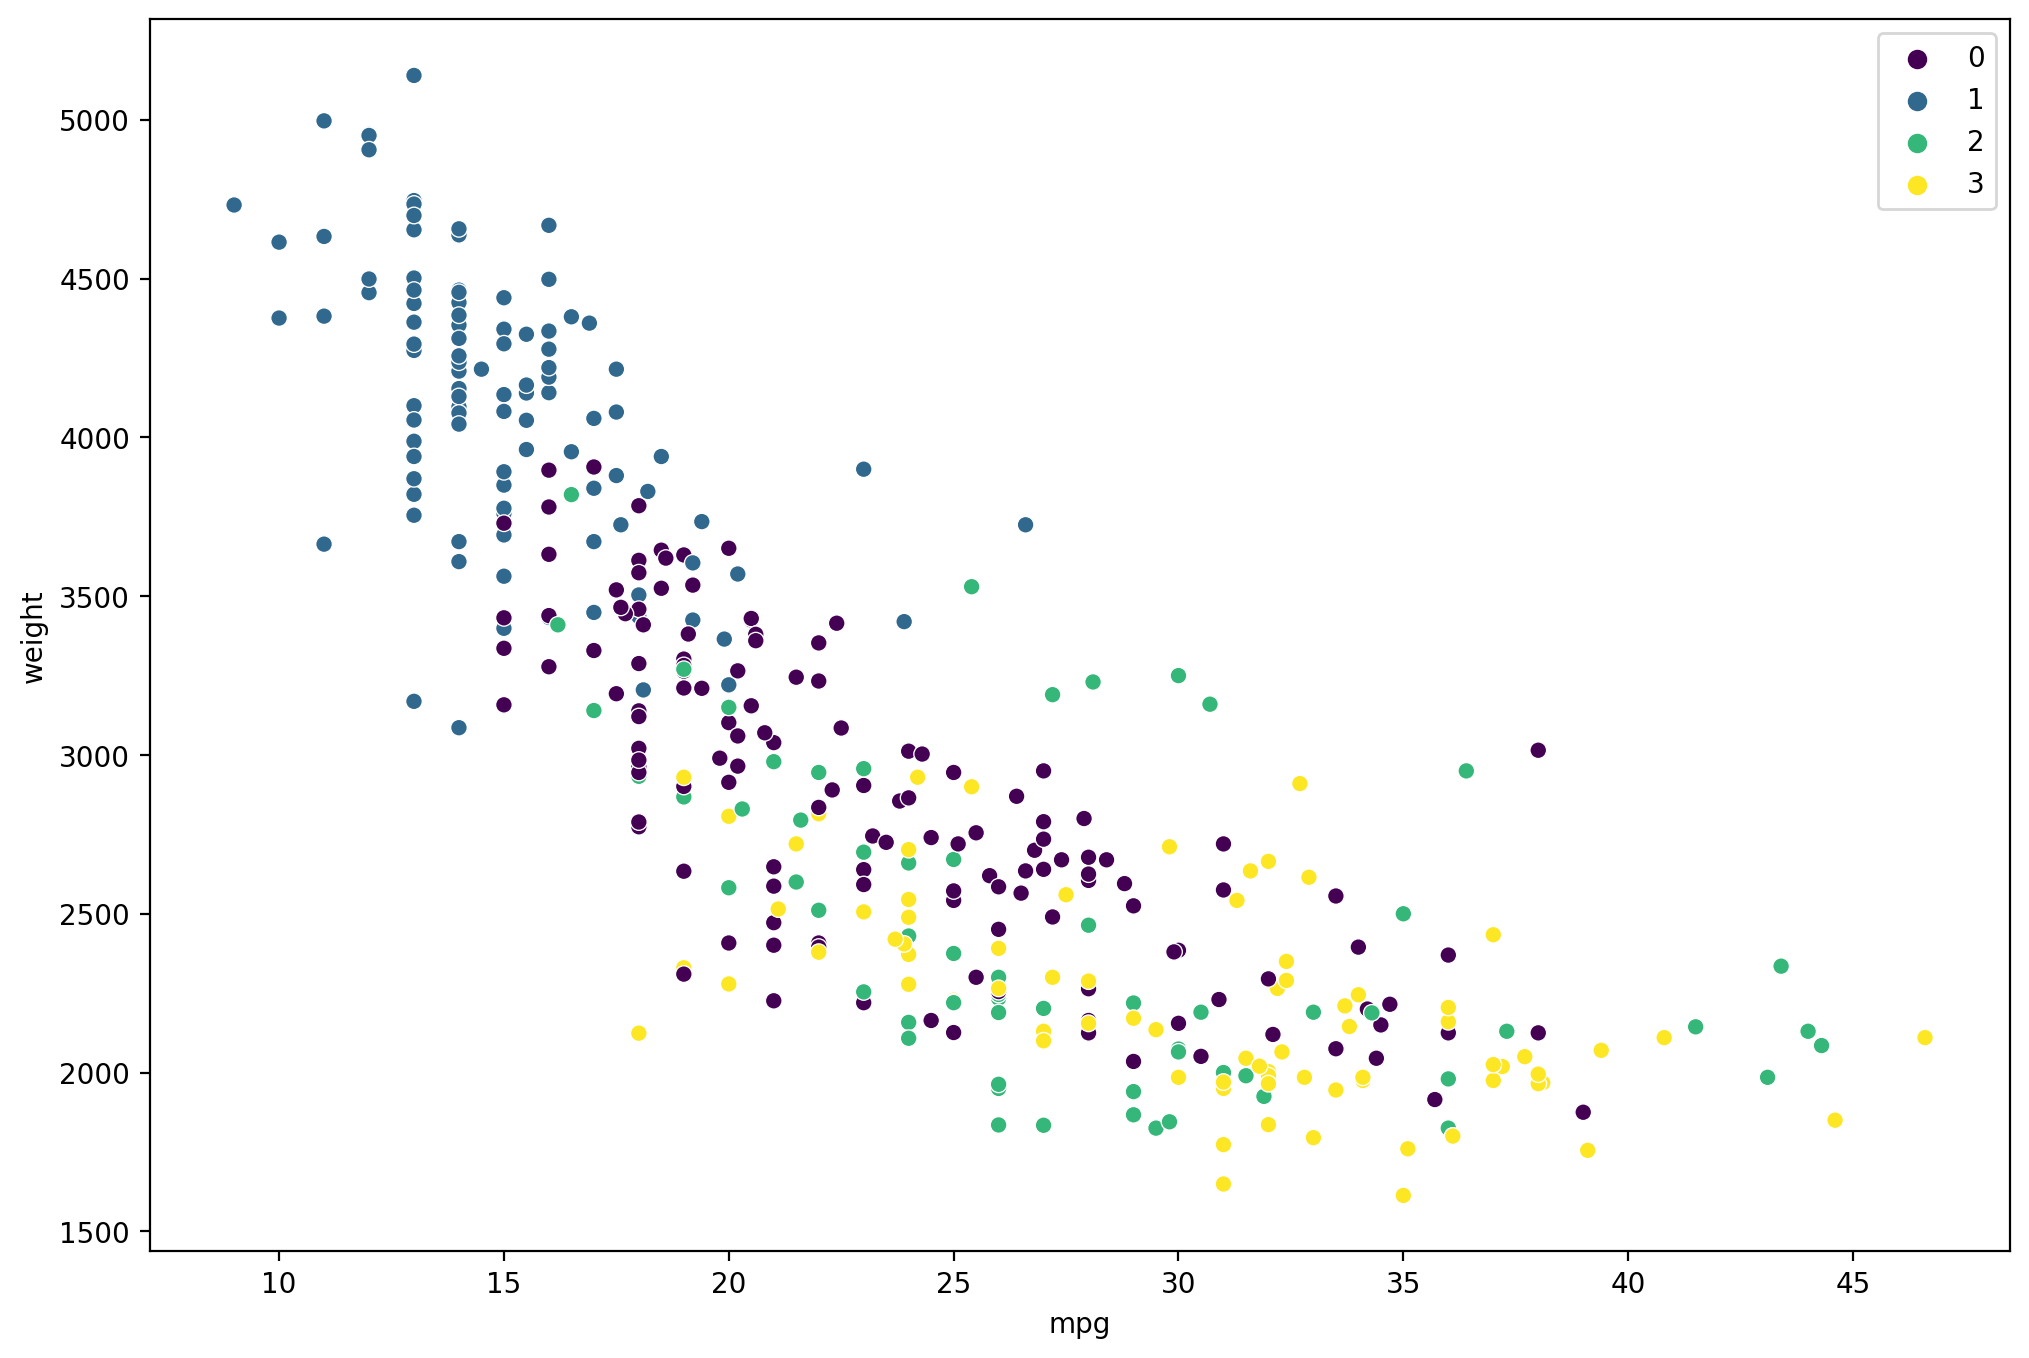

In [28]:
plt.figure(figsize=(12,8),dpi=200)
sns.scatterplot(data = df,x = 'mpg', y= 'weight',hue=cluster_label,palette='viridis')

In [29]:
##Dendogram 

In [30]:
len(scaled_df.columns)

10

In [31]:
np.sqrt(10) ## Max distance between two points

3.1622776601683795


## Parameters
----------
n_clusters : int or None, default=2
    The number of clusters to find. It must be ``None`` if
    ``distance_threshold`` is not ``None``.

affinity : str or callable, default='euclidean'
    Metric used to compute the linkage. Can be "euclidean", "l1", "l2",
    "manhattan", "cosine", or "precomputed".
    If linkage is "ward", only "euclidean" is accepted.
    If "precomputed", a distance matrix (instead of a similarity matrix)
    is needed as input for the fit method.

memory : str or object with the joblib.Memory interface, default=None
    Used to cache the output of the computation of the tree.
    By default, no caching is done. If a string is given, it is the
    path to the caching directory.

connectivity : array-like or callable, default=None
    Connectivity matrix. Defines for each sample the neighboring
    samples following a given structure of the data.
    This can be a connectivity matrix itself or a callable that transforms
    the data into a connectivity matrix, such as derived from
    `kneighbors_graph`. Default is ``None``, i.e, the
    hierarchical clustering algorithm is unstructured.

compute_full_tree : 'auto' or bool, default='auto'
    Stop early the construction of the tree at ``n_clusters``. This is
    useful to decrease computation time if the number of clusters is not
    small compared to the number of samples. This option is useful only
    when specifying a connectivity matrix. Note also that when varying the
    number of clusters and using caching, it may be advantageous to compute
    the full tree. It must be ``True`` if ``distance_threshold`` is not
    ``None``. By default `compute_full_tree` is "auto", which is equivalent
    to `True` when `distance_threshold` is not `None` or that `n_clusters`
    is inferior to the maximum between 100 or `0.02 * n_samples`.
    Otherwise, "auto" is equivalent to `False`.

linkage : {'ward', 'complete', 'average', 'single'}, default='ward'
    Which linkage criterion to use. The linkage criterion determines which
    distance to use between sets of observation. The algorithm will merge
    the pairs of cluster that minimize this criterion.

    - 'ward' minimizes the variance of the clusters being merged.
    - 'average' uses the average of the distances of each observation of
      the two sets.
    - 'complete' or 'maximum' linkage uses the maximum distances between
      all observations of the two sets.
    - 'single' uses the minimum of the distances between all observations
      of the two sets.

    .. versionadded:: 0.20
        Added the 'single' option

distance_threshold : float, default=None
    The linkage distance threshold above which, clusters will not be
    merged. If not ``None``, ``n_clusters`` must be ``None`` and
    ``compute_full_tree`` must be ``True``.


In [32]:
model = AgglomerativeClustering(n_clusters=None,distance_threshold=0)

In [33]:
cluster = model.fit_predict(scaled_df)

In [34]:
cluster

array([247, 252, 360, 302, 326, 381, 384, 338, 300, 279, 217, 311, 377,
       281, 232, 334, 272, 375, 354, 333, 317, 345, 329, 289, 305, 383,
       290, 205, 355, 269, 202, 144, 245, 297, 386, 358, 199, 337, 330,
       339, 293, 352, 283, 196, 253, 168, 378, 331, 201, 268, 256, 361,
       250, 197, 246, 371, 324, 230, 203, 261, 380, 376, 308, 389, 332,
       306, 236, 391, 350, 274, 288, 313, 231, 298, 100, 295, 210, 248,
       187, 390, 373, 266, 307, 379, 212, 357, 191, 314, 208, 249, 343,
       294, 374, 322, 323, 362, 188, 296, 369, 286, 251, 229, 244, 285,
       349, 365, 259, 213, 276, 215, 222, 204, 359, 287, 166, 387, 291,
       220, 216, 260, 129, 367, 340, 346, 301, 342, 228, 388, 370, 218,
       255, 327, 347, 278, 271, 258, 282, 318, 273, 123, 172, 382, 363,
       356, 195, 280, 239, 364, 267, 351, 186, 257, 277, 299, 127, 366,
       234, 385, 192, 372, 292, 233, 270, 263, 133, 165, 161, 198,  97,
       315, 134, 207, 147, 175, 262, 348,  98, 214,  48, 353, 17

In [36]:
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster import hierarchy

In [37]:
linkage_matrix = hierarchy.linkage(model.children_)

In [39]:
linkage_matrix#The numbers represent we are going to combine two clusters and give distance
#cluster 67 and #cluster 161  and distance between the is 1,41 adn 2 is the number of points
#in the cluster

array([[ 67.        , 161.        ,   1.41421356,   2.        ],
       [ 10.        ,  45.        ,   1.41421356,   2.        ],
       [ 47.        ,  99.        ,   1.41421356,   2.        ],
       ...,
       [340.        , 777.        ,  56.40035461, 389.        ],
       [332.        , 778.        ,  58.69412236, 390.        ],
       [349.        , 779.        ,  75.32595834, 391.        ]])

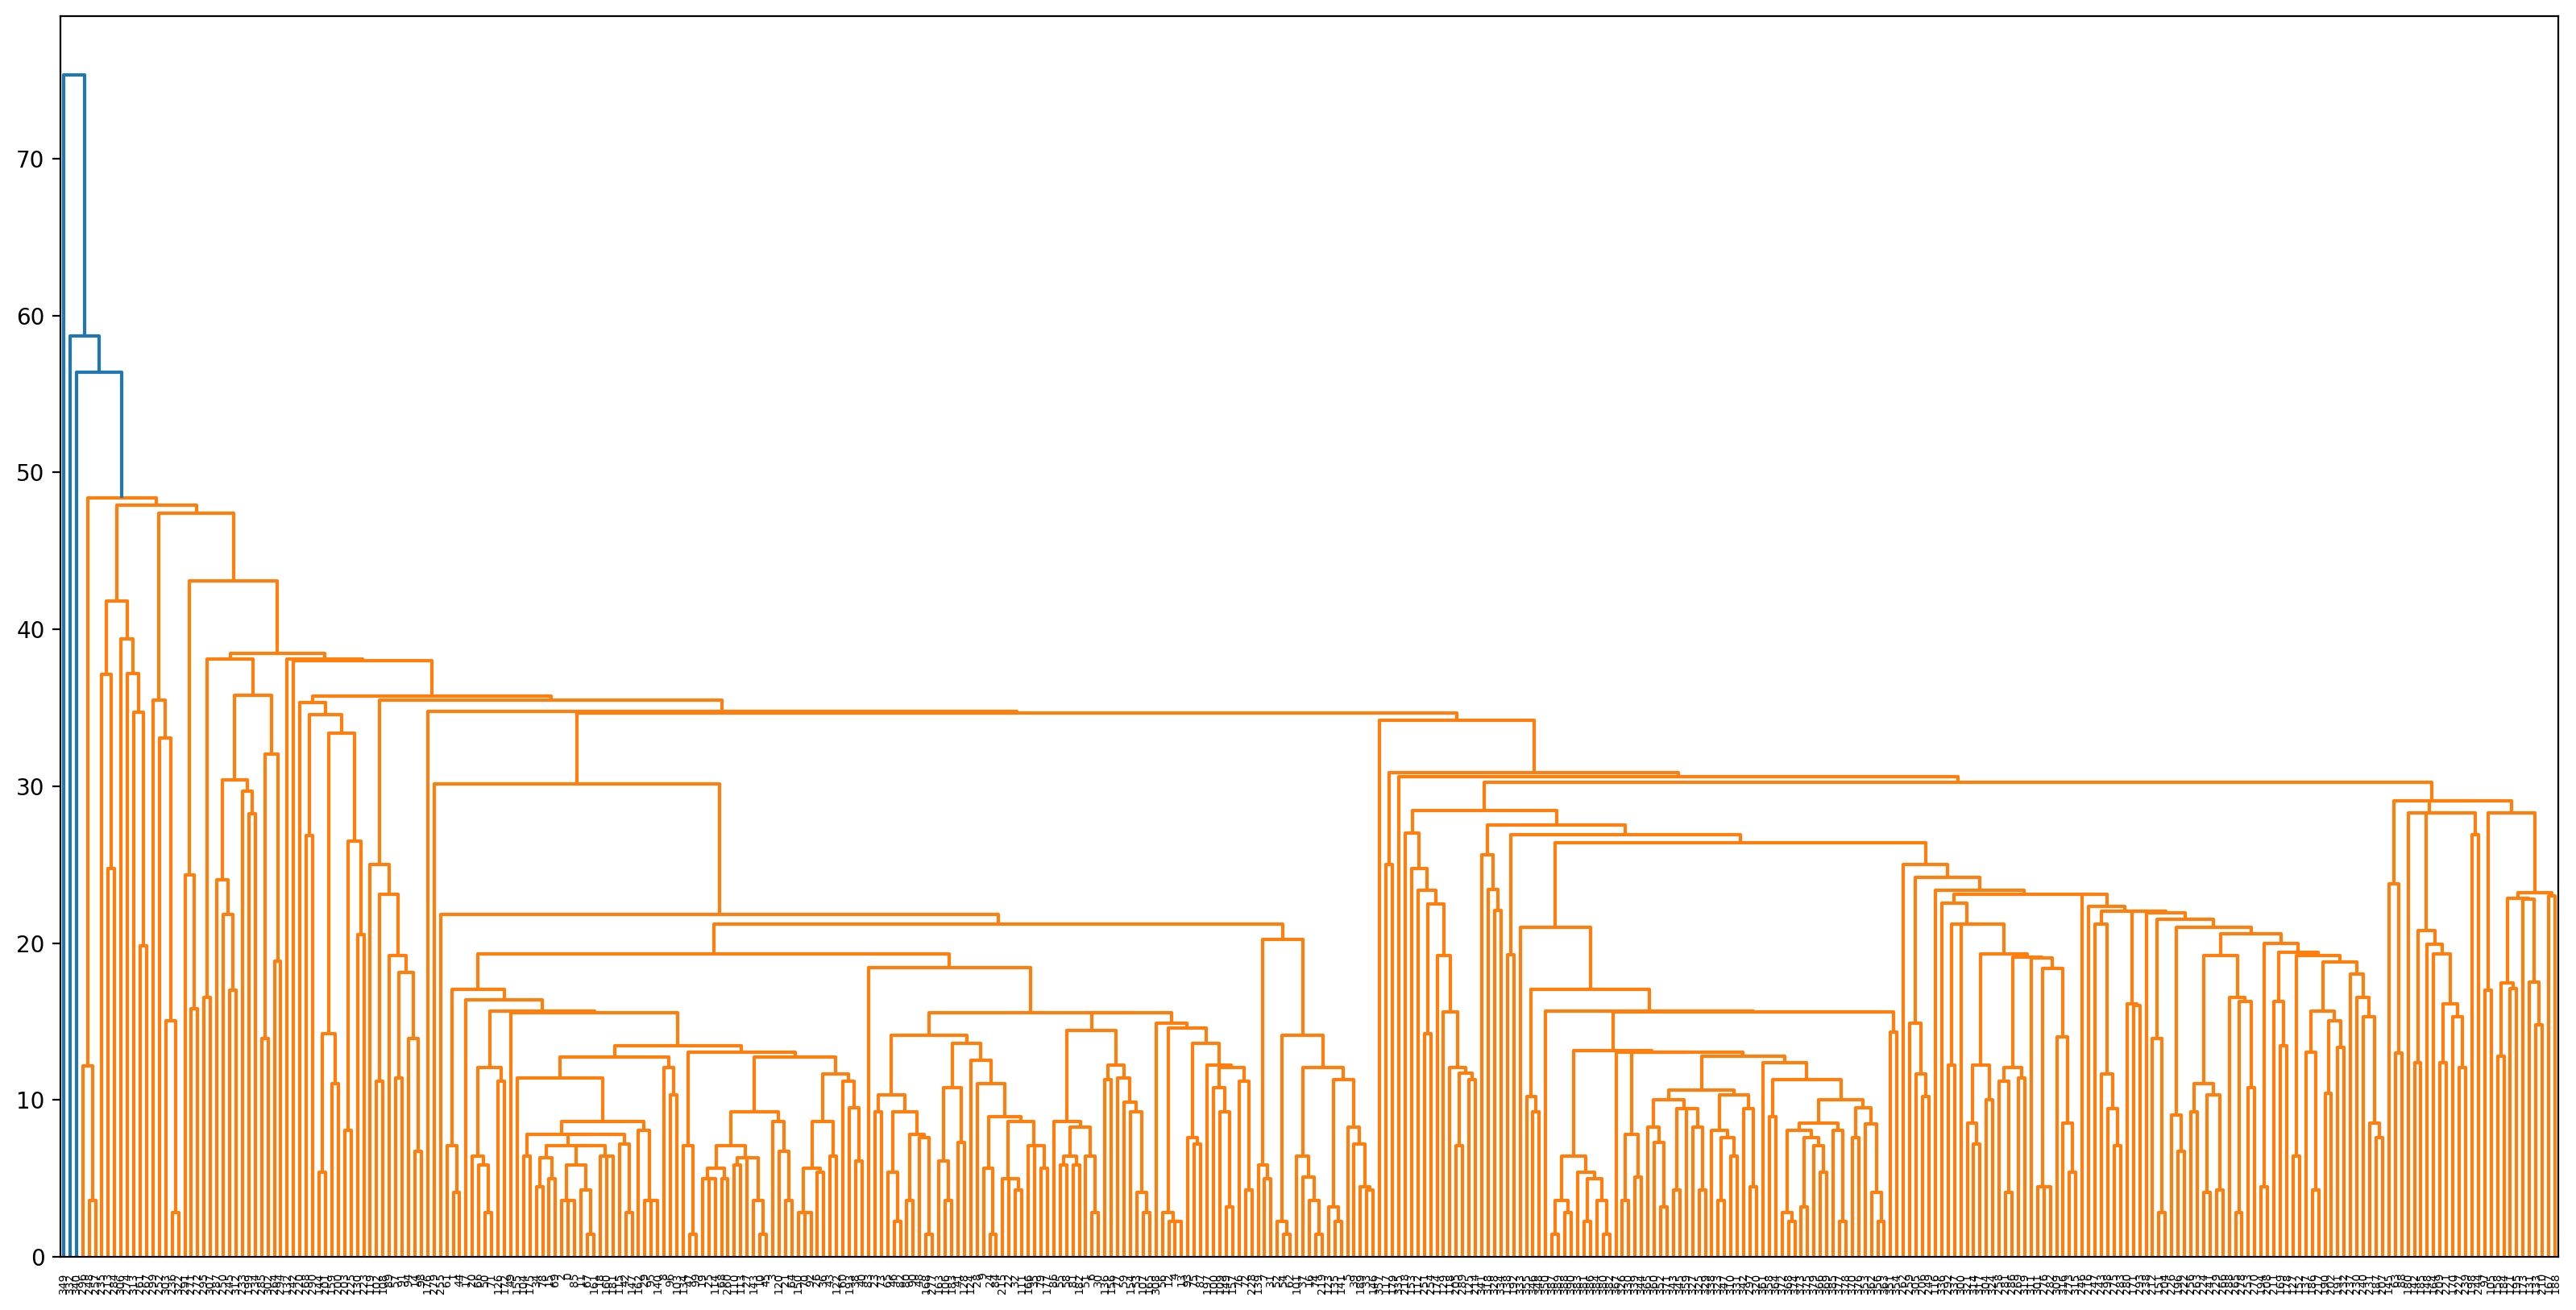

In [40]:
plt.figure(figsize=(20,10),dpi=200)
dendo = dendrogram(linkage_matrix)

In [ ]:
#The linkage goes from 2 to n-1


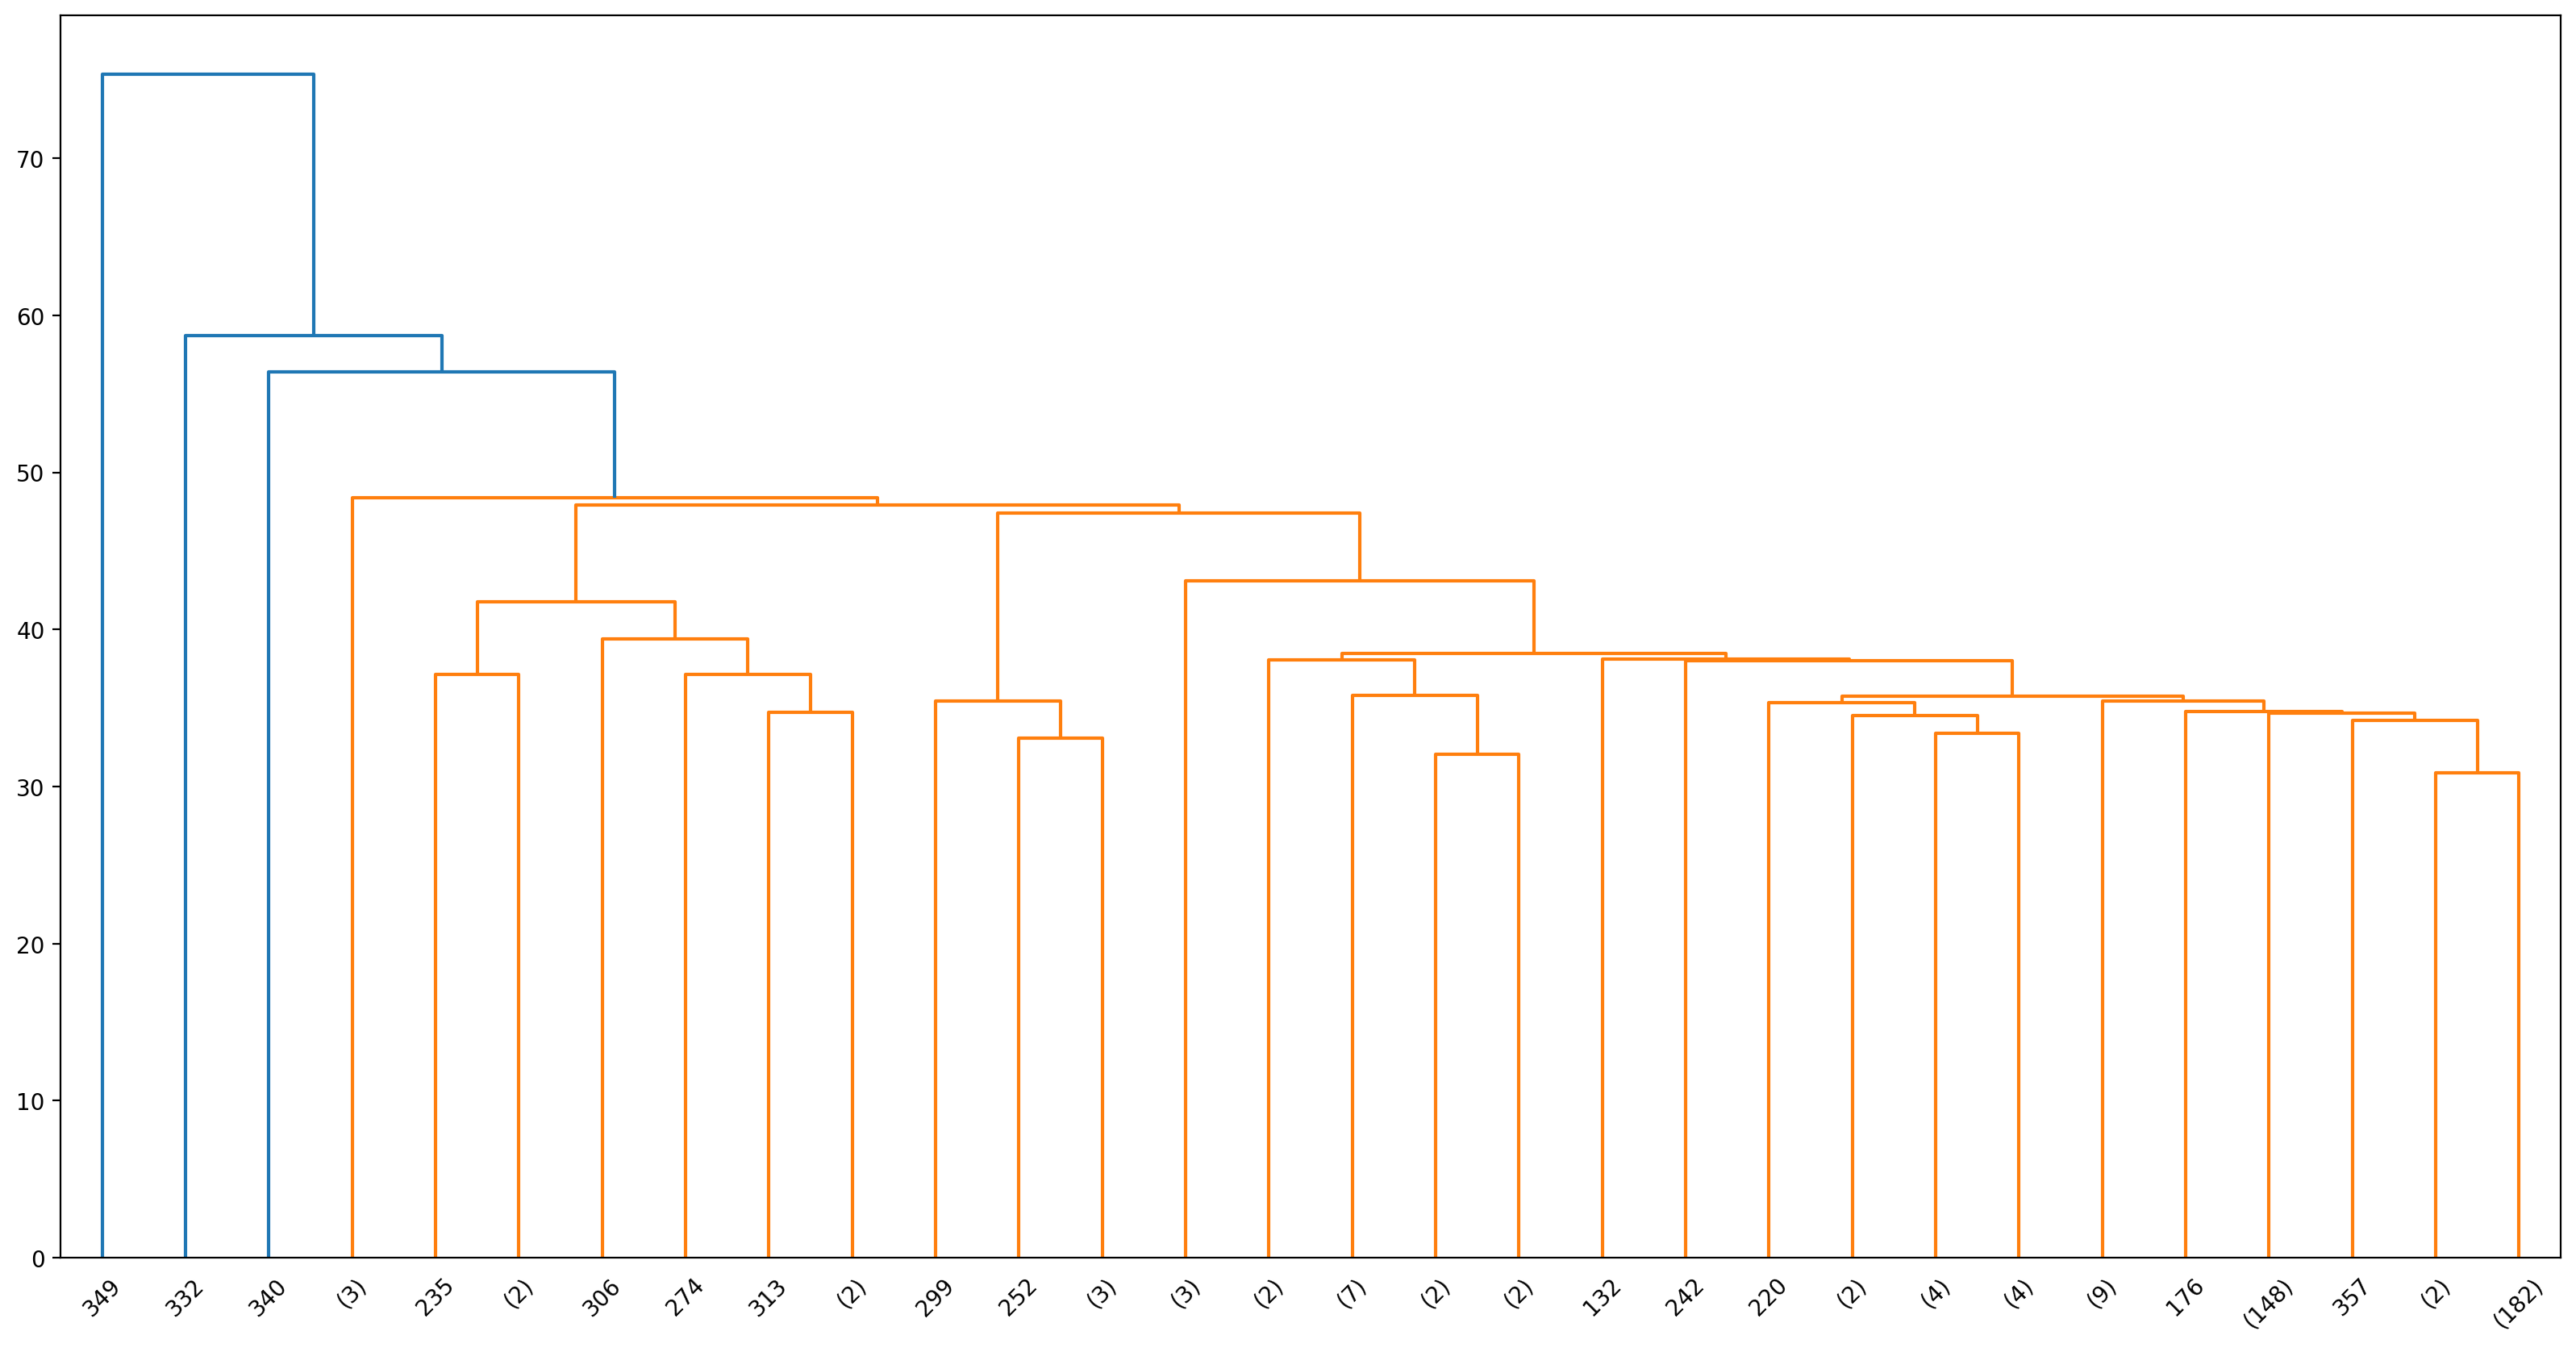

In [42]:
plt.figure(figsize=(20,10),dpi=200)
dendo = dendrogram(linkage_matrix,truncate_mode='lastp')

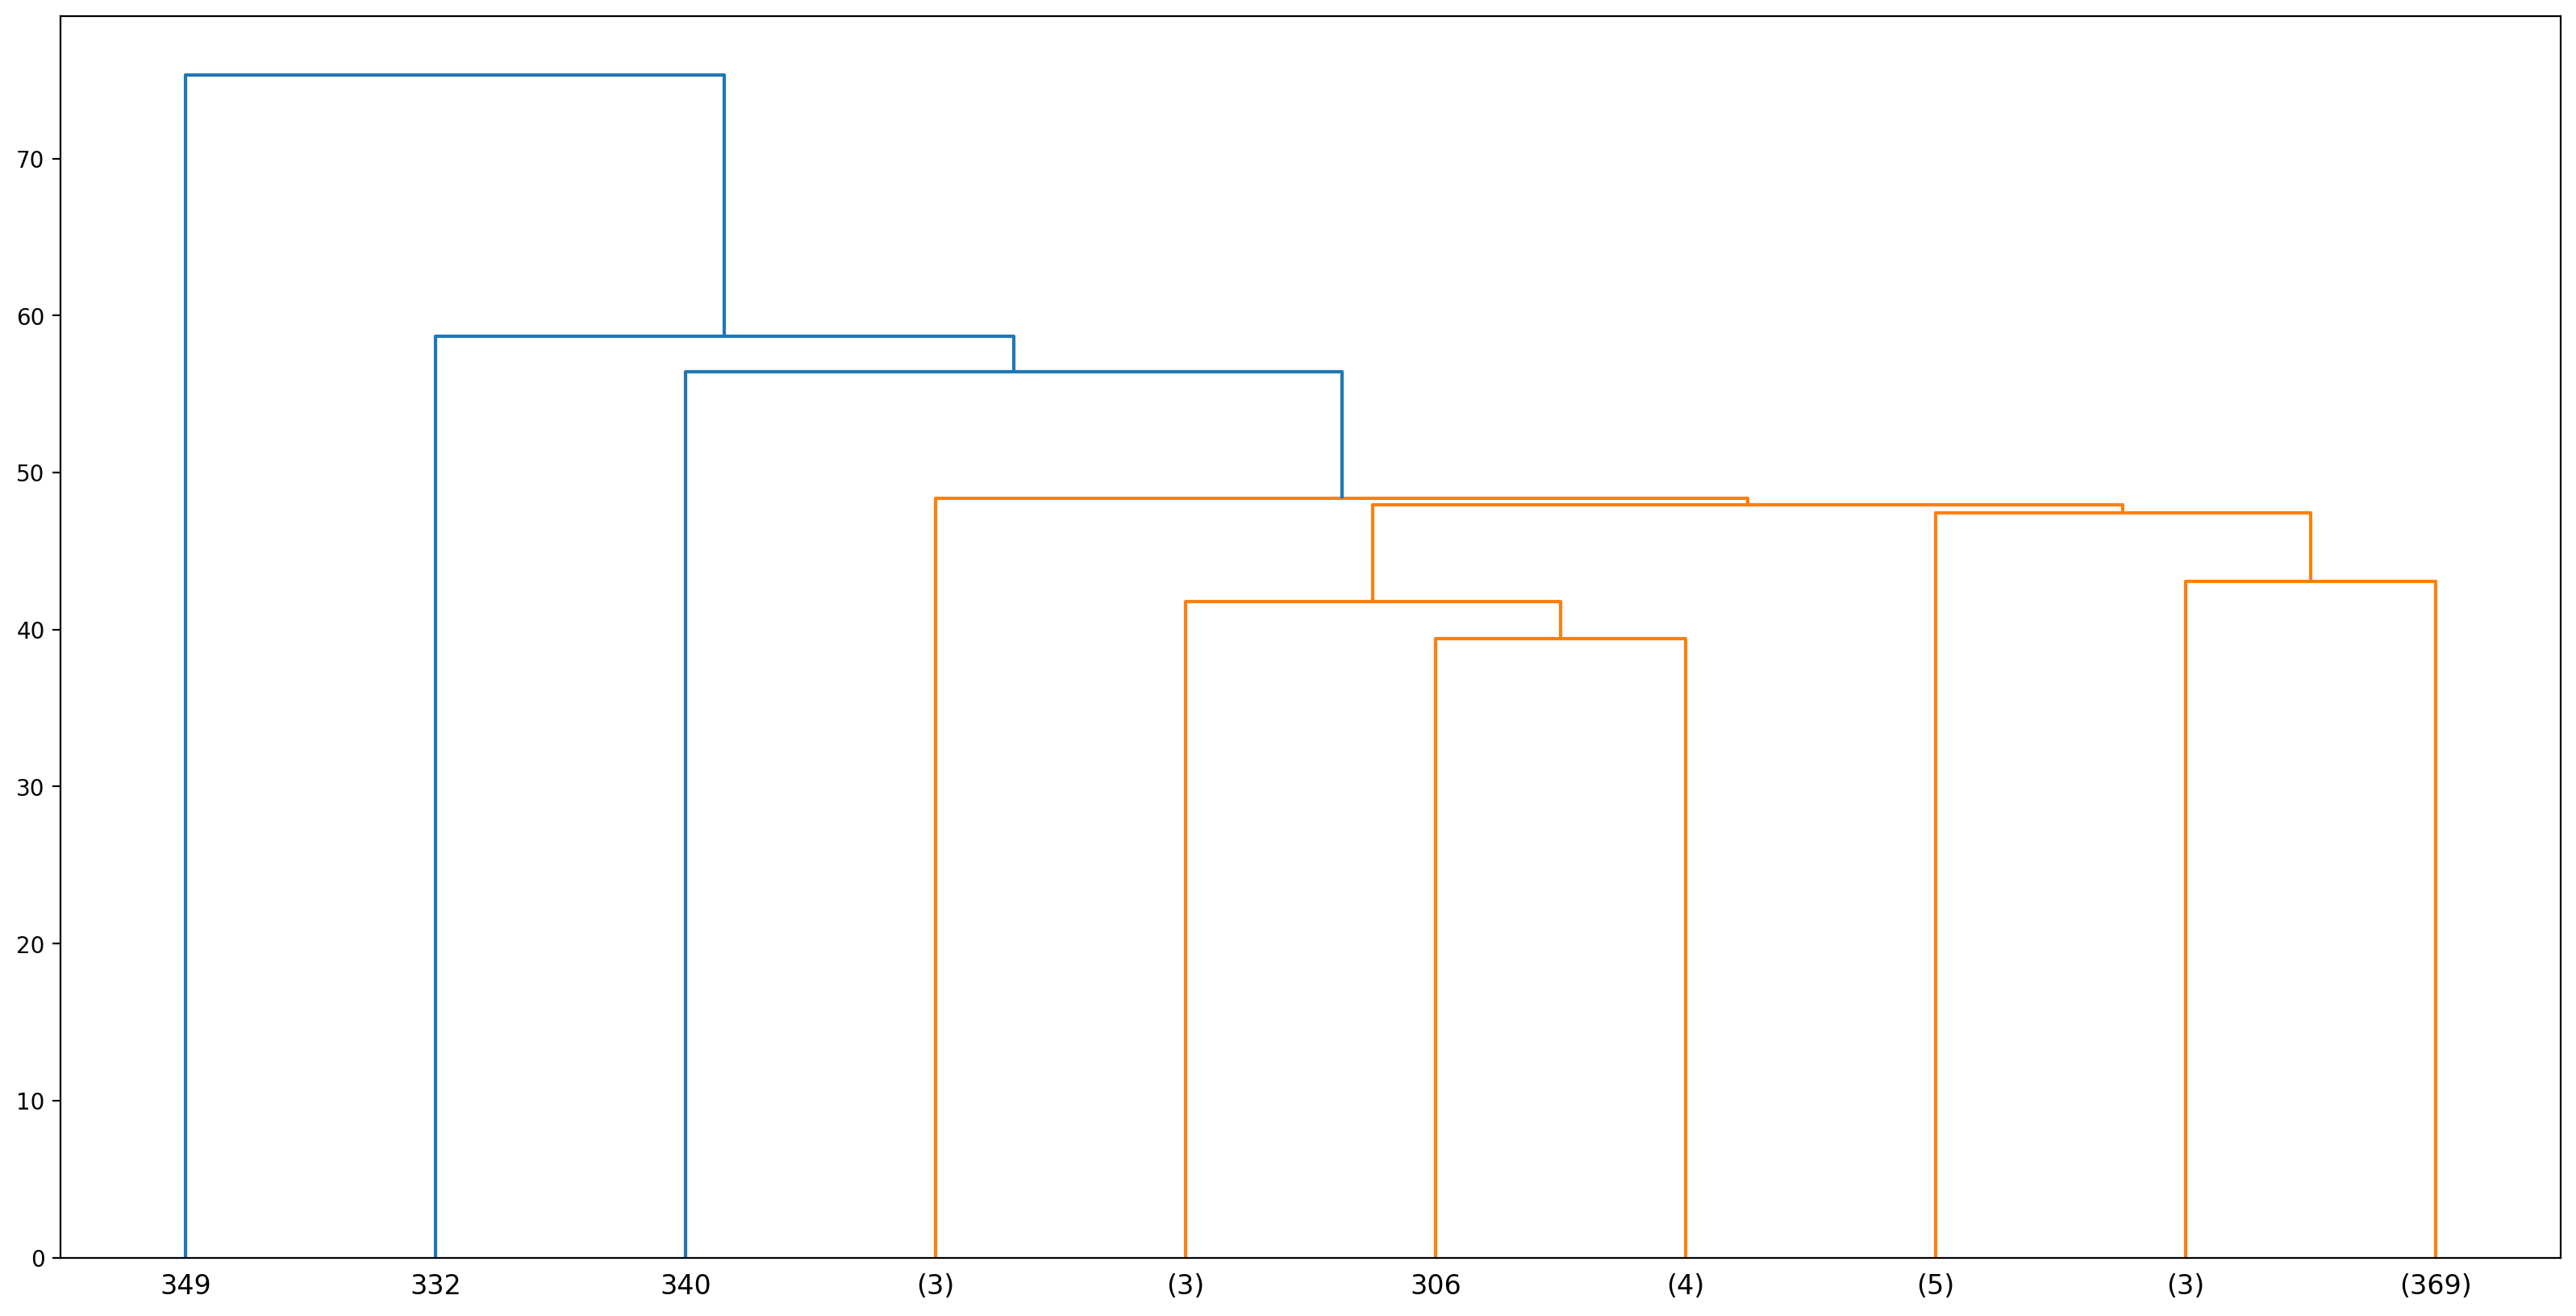

In [43]:
plt.figure(figsize=(20,10),dpi=200)
dendo = dendrogram(linkage_matrix,truncate_mode='lastp',p=10)

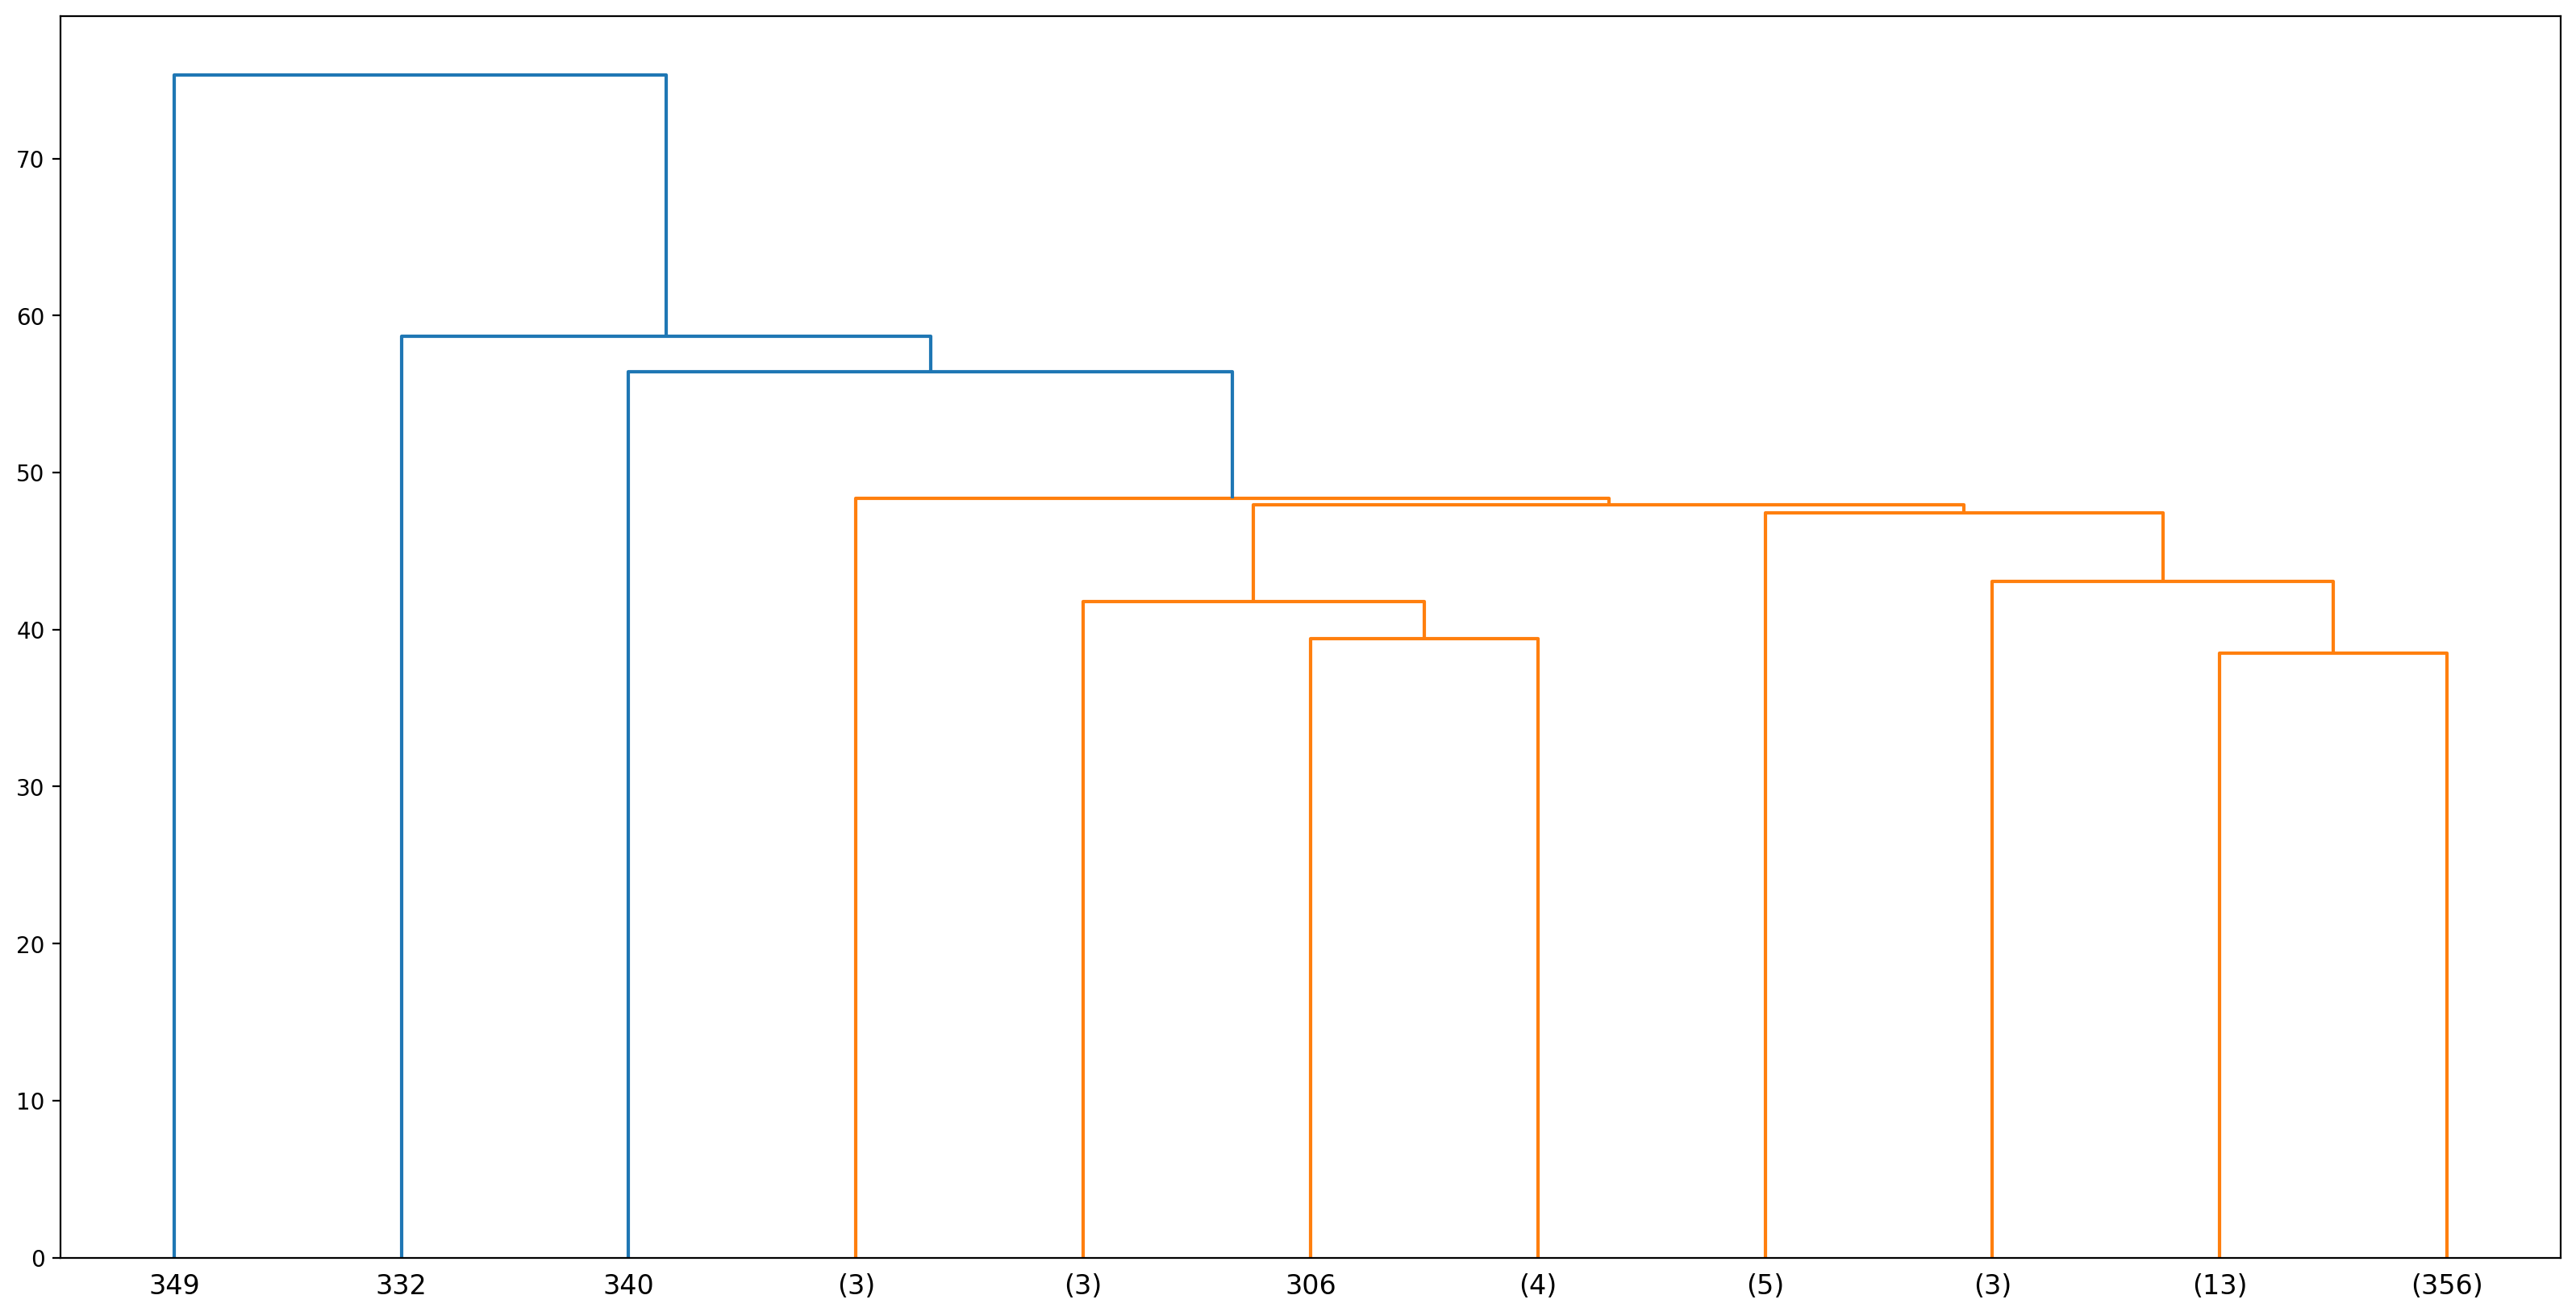

In [56]:
plt.figure(figsize=(20,10),dpi=200)
dendo = dendrogram(linkage_matrix,truncate_mode='lastp',p=11)    
#No more than p level are shown 

In [49]:
scaled_df.describe().T

,count,mean,std,min,25%,50%,75%,max
mpg,392.0,0.384200,0.207580,0.0,0.212766,0.365691,0.531915,1.0
cylinders,392.0,0.494388,0.341157,0.0,0.200000,0.200000,1.000000,1.0
displacement,392.0,0.326646,0.270398,0.0,0.095607,0.214470,0.536822,1.0
horsepower,392.0,0.317768,0.209191,0.0,0.157609,0.258152,0.434783,1.0
weight,392.0,0.386897,0.240829,0.0,0.173589,0.337539,0.567550,1.0
acceleration,392.0,0.448888,0.164218,0.0,0.343750,0.446429,0.537202,1.0
model_year,392.0,0.498299,0.306978,0.0,0.250000,0.500000,0.750000,1.0
origin_europe,392.0,0.173469,0.379136,0.0,0.000000,0.000000,0.000000,1.0
origin_japan,392.0,0.201531,0.401656,0.0,0.000000,0.000000,0.000000,1.0
origin_usa,392.0,0.625000,0.484742,0.0,0.000000,1.000000,1.000000,1.0


In [50]:
scaled_df['mpg'].idxmax()

320

In [51]:
scaled_df['mpg'].idxmin()

28

In [52]:
car_a = scaled_df.iloc[320]
car_b = scaled_df.iloc[28]

In [54]:
distance = np.linalg.norm(car_a-car_b)

In [55]:
distance


2.3852929970374714